In [14]:
!pip install langdetect
!pip install iso-639
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168840 sha256=d8896f77eb93e3bb1c44360920bbc0d49206621dde6977067630e90e054f0245
  Stored in directory: /home/sagemaker-user/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909c0a0bfa0bbcb5c7771f
Successfully built iso-639


In [15]:
import pandas as pd
from langdetect import detect
from iso639 import languages
import swifter

In [42]:
df1 = pd.read_pickle('email-processed-data_0502.pkl')
df2 = pd.read_pickle('email-processed-data_0503.pkl')
df3 = pd.read_pickle('email-processed-data_0506.pkl')
df4 = pd.read_pickle('email-processed-data_0507.pkl')
df = pd.concat([df1, df2, df3, df4])
df = df[['email_body', 'subject']]
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [39]:
def language(x):
    try:
        return languages.get(alpha2=detect(x)).name
    except:
        return None

In [43]:
df['language'] = df['email_body'].swifter.apply(language)

Pandas Apply:   0%|          | 0/12733 [00:00<?, ?it/s]

In [44]:
df[['email_body', 'language']].groupby(['language']).count()

,email_body
language,
Afrikaans,1
Catalan,26
Danish,2
Dutch,1716
English,10162
Estonian,9
French,6
German,759
Latvian,1


<Axes: xlabel='language'>

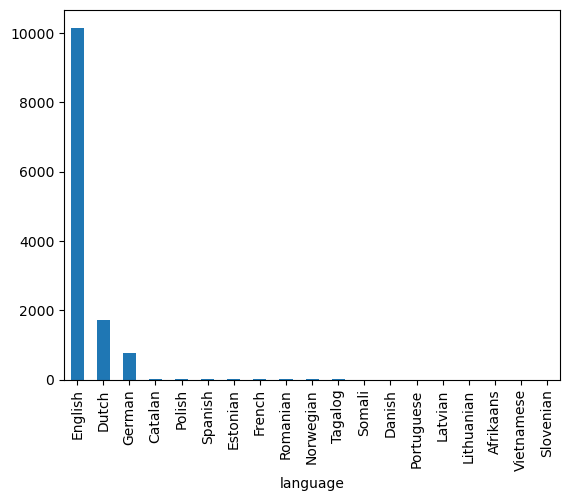

In [45]:
df['language'].value_counts().plot(kind='bar')

In [49]:
df[df['language'] == 'English']

,email_body,subject,language
0,Add one of these board seats to your credentia...,5 Boards to Boost Your Credentials in May,English
1,Load # Invoice Number Last Free Day Total Weig...,(PROD)loadmaster(1hr) 05/02/2024,English
2,Load # Invoice Number Last Free Day Total Weig...,(PROD)loasmater(30min) 05/02/2024,English
3,Load # Invoice Number Last Free Day Total Weig...,(PROD)loadmaster(15min) 05/02/2024,English
4,Load # Invoice Number Last Free Day Total Weig...,(PRE)15min 05/02/2024,English
...,...,...,...
12725,Thank you J\n\n \n\nPlease note that due to Pu...,RE: Cartage Advice / S2401820048-3 / Würselen,English
12728,Add freely.\n\n5/8: +34\n\n5/9: +38\n\n5/10:...,"Capacity today is +50, 5/7/24",English
12729,I do not see that it was ever sent so I would ...,RE: RPAC E104664,English
12730,Attached is the POD for the following containe...,POD - MINTURN NUT COMPANY - NYKU4330400,English
